# Logistic Regression

### Aaron Gonzales
### CS529, Machine Learning
### Project 3
### Instructor: Trilce Estrada

## Overview of the project

I have a working logistic regression classifier built in python and numpy. It seems to work somewhat quickly but may not be that robust or as stable as I'd like it to be. There are a great number of things to look at with respect to optimizing gradient descent and the various fiddly bits of the program.

This is an ipython notebook; code can be executed direclty from here. 

When you run the program, navigate to the root of this project and then to `/src`.

```python3 ./main.py``` 

will make the program work. 


In [22]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sklearn.metrics  as metrics
import utils as utils
from LogisticRegressionClassifier import LogisticRegressionClassifier
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


I had previously extracted the ffts and mcfts from the data; all of them live in the /data/ folder of this package. As such, loading them in is easy. Methods to extract them are in the `fft.py` and `mfcc.py` files; both were ran from an IPython environment. The FFT data was scaled to {0, 1} and the mfcs were scaled via z-score. the data is the variables `(fft, mfcs)`, the labels are hopefully labeled clearly enough, and the dictionary is just a mapping of label ID to actual english word.

###### Note: I used the full 1000 song dataset for this; not the reduced set from Trilce. 

In [2]:
fft_dict, fft_labels, ffts = utils.read_features(feature='fft')
mfc_dict, mfc_labels, mfcs = utils.read_features(feature='mfc')

The classifer is implemented as a class and holds its metrics and data information internally after calls to its methods. It is initialized with the data as given:

In [3]:
lrc_fft = LogisticRegressionClassifier(ffts, fft_labels, fft_dict)
lrc_mfc = LogisticRegressionClassifier(mfcs, mfc_labels, mfc_dict)

## FFT components

Now that we have our data loaded, we can go ahead and fit the logistic regression model to it. Internally it is performing 10-fold cross validation with shuffling via Sklearn's `cross_validated` module. 

### Gradient Descent
I went with the vectorized version of gradient descent discussed in Piazza. My learning rate was adaptive to the custom 'error' rate defined as the max value from the dot product between the  

$$\Delta

In [5]:
lrc_fft.cross_validate()

Training cross validation round 0
----------------------------------
Step 0: Error: -1.000000 updating learning rate: 0.001000
Final Step 1000: Error: 0.120369 
 Learn rate: 0.001000
classification report 
----------------------------------
             precision    recall  f1-score   support

      blues       0.30      0.30      0.30        10
      disco       0.50      0.38      0.43        13
       rock       0.38      0.27      0.32        11
     reggae       0.11      0.10      0.11        10
       jazz       0.22      0.29      0.25         7
  classical       0.47      0.78      0.58         9
     hiphop       0.18      0.25      0.21         8
        pop       0.33      0.43      0.38         7
      metal       0.82      0.75      0.78        12
    country       0.38      0.23      0.29        13

avg / total       0.39      0.38      0.38       100

Confusion matrix
----------------------------------
[[3 0 1 3 2 0 0 0 1 0]
 [0 5 2 0 2 0 2 2 0 0]
 [1 1 3 2 0 0 1 0 1 2]

These are not the best scores i've ever seen.

Selecting only the features that have moderate variance gives us a set of 200 to test.

In [7]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.01150)
a = sel.fit_transform(ffts)
a.shape
lr = LogisticRegressionClassifier(a, fft_labels, fft_dict)
lr.cross_validate()

Training cross validation round 0
----------------------------------
Step 0: Error: -1.000000 updating learning rate: 0.001000
Final Step 1000: Error: 0.209789 
 Learn rate: 0.001000
classification report 
----------------------------------
             precision    recall  f1-score   support

      blues       0.23      0.43      0.30         7
      disco       0.20      0.15      0.17        13
       rock       0.30      0.33      0.32         9
     reggae       0.09      0.09      0.09        11
       jazz       0.14      0.08      0.11        12
  classical       1.00      0.25      0.40         8
     hiphop       0.12      0.10      0.11        10
        pop       0.60      0.43      0.50        14
      metal       0.22      0.67      0.33         6
    country       0.18      0.20      0.19        10

avg / total       0.30      0.25      0.25       100

Confusion matrix
----------------------------------
[[3 0 0 2 1 0 0 0 0 1]
 [1 2 5 0 0 0 1 0 3 1]
 [1 0 3 0 0 0 2 0 2 1]

Those scores went down, so I presume that I did something wrong or that ther is incredible bias or multicoliniarty in this model. I'll try PCA and see how that goes.

In [8]:
from sklearn.decomposition import PCA

In [9]:
p = PCA(n_components=200)

In [10]:
pcad = p.fit_transform(ffts)

In [15]:
pcalrc = LogisticRegressionClassifier(pcad, fft_labels, fft_dict)

In [16]:
pcalrc.cross_validate(3)

Training cross validation round 0
----------------------------------
Step 0: Error: -1.000000 updating learning rate: 0.001000
Final Step 1000: Error: 0.226925 
 Learn rate: 0.001000
classification report 
----------------------------------
             precision    recall  f1-score   support

      blues       0.29      0.17      0.21        42
      disco       0.18      0.06      0.09        36
       rock       0.25      0.12      0.16        25
     reggae       0.33      0.21      0.25        34
       jazz       0.30      0.22      0.25        37
  classical       0.29      0.83      0.43        36
     hiphop       0.22      0.16      0.19        31
        pop       0.57      0.46      0.51        28
      metal       0.43      0.79      0.55        33
    country       0.22      0.19      0.20        32

avg / total       0.30      0.32      0.28       334

Confusion matrix
----------------------------------
[[ 7  1  1  4  3  8  4  0  9  5]
 [ 3  2  3  2  2 10  2  2 10  0]
 [

Not much better. 
Results are holding steady around 30%. 
On to the MFC features.

In [18]:
# this was already fit
lrc_mfc.cross_validate(10)

Training cross validation round 0
----------------------------------
Step 0: Error: -1.000000 updating learning rate: 0.001000
Final Step 1000: Error: 0.090336 
 Learn rate: 0.001000
classification report 
----------------------------------
             precision    recall  f1-score   support

      blues       0.53      0.62      0.57        13
      disco       0.42      0.56      0.48         9
       rock       0.14      0.10      0.12        10
     reggae       0.50      0.62      0.56         8
       jazz       0.20      0.17      0.18         6
        pop       0.80      0.75      0.77        16
  classical       1.00      0.80      0.89        10
     hiphop       0.25      0.29      0.27         7
    country       0.50      0.44      0.47         9
      metal       0.83      0.83      0.83        12

avg / total       0.56      0.56      0.56       100

Confusion matrix
----------------------------------
[[ 8  0  0  1  1  0  0  1  0  2]
 [ 0  5  2  0  0  1  0  1  0  0]
 [

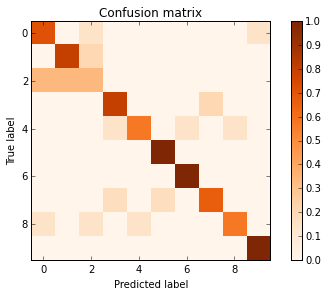

In [23]:
_ = utils.plot_confusion_matrix(lrc_mfc.metrics['cv_average'])

I suspect it is likely that we threw away too much information with the MFCs by only looking at the short window of time and a very broad mean of them. Combining them or a different time-series representation may boost our luck. 